# Assignment Solutions
Linear Regression, Logistic Regression, and K-Means (From Scratch)



In [1]:
import numpy as np
import matplotlib.pyplot as plt


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.

## STANDARDIZATION


In [2]:

class StandardScalerManual:
    def fit(self, X):
        self.mean_ = np.mean(X, axis=0)
        self.std_ = np.std(X, axis=0)
        self.std_[self.std_ == 0] = 1.0

    def transform(self, X):
        return (X - self.mean_) / self.std_

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


## Linear Regression with Gradient Descent and L2


In [3]:

class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # start with zero weights and let gradient descent learn everything
        self.w = np.zeros(n_features)
        # bias initialized to zero as well
        self.b = 0.0
        self.losses = []

        # run gradient descent for fixed number of epochs
        for _ in range(self.epochs):
            # linear model: y_hat = Xw + b
            y_pred = X @ self.w + self.b
            # difference between prediction and true value
            error = y_pred - y
            loss = np.mean(error ** 2) + self.l2_lambda * np.sum(self.w ** 2)
            self.losses.append(loss)

            # gradient w.r.t weights
            dw = (2 / n_samples) * (X.T @ error) + 2 * self.l2_lambda * self.w
            # gradient w.r.t bias
            db = (2 / n_samples) * np.sum(error)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b


## Linear Regression Demo



In [4]:

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 * X.squeeze() + 3 + np.random.randn(100)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

model = LinearRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
model.fit(X_scaled, y)

y_pred = model.predict(X_scaled)


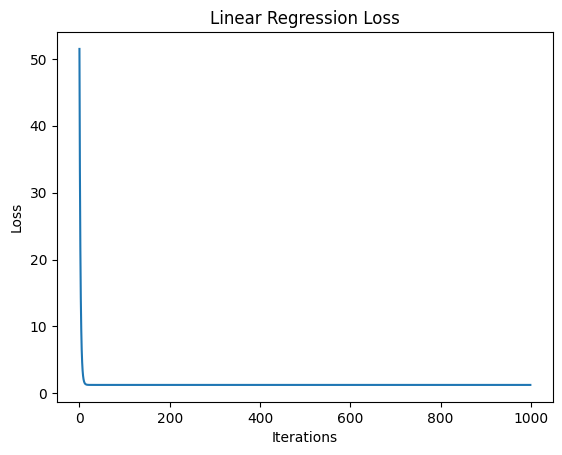

In [5]:

plt.plot(model.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Linear Regression Loss")
plt.show()


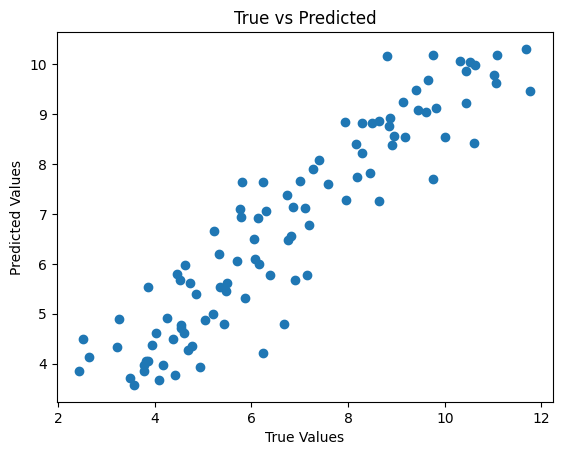

In [6]:

plt.scatter(y, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted")
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [7]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [8]:

class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # start with zero weights and let gradient descent learn everything
        self.w = np.zeros(n_features)
        # bias initialized to zero as well
        self.b = 0.0
        self.losses = []

        # run gradient descent for fixed number of epochs
        for _ in range(self.epochs):
            z = X @ self.w + self.b
            y_hat = sigmoid(z)

            loss = -np.mean(
                y * np.log(y_hat + 1e-9) +
                (1 - y) * np.log(1 - y_hat + 1e-9)
            ) + self.l2_lambda * np.sum(self.w ** 2)

            self.losses.append(loss)

            # gradient w.r.t weights
            dw = (1 / n_samples) * (X.T @ (y_hat - y)) + 2 * self.l2_lambda * self.w
            # gradient w.r.t bias
            db = (1 / n_samples) * np.sum(y_hat - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict_proba(self, X):
        return sigmoid(X @ self.w + self.b)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)


## Logistic Regression Demo




In [9]:

np.random.seed(0)
X = np.random.randn(200, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)

scaler = StandardScalerManual()
X_scaled = scaler.fit_transform(X)

clf = LogisticRegressionManual(lr=0.1, epochs=1000, l2_lambda=0.1)
clf.fit(X_scaled, y)

preds = clf.predict(X_scaled)
print("Accuracy:", np.mean(preds == y))


Accuracy: 0.985


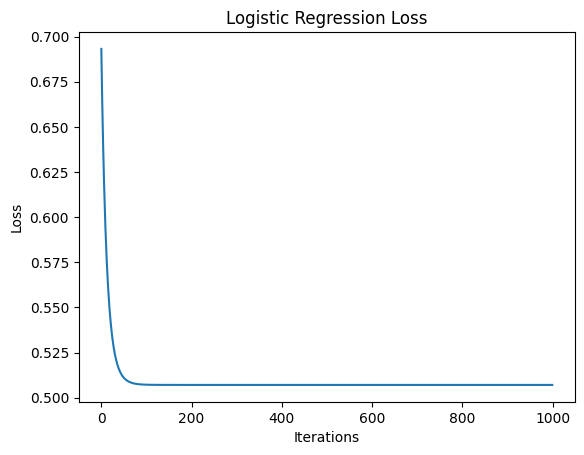

In [10]:

plt.plot(clf.losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Logistic Regression Loss")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [11]:

def kmeans_matrix(M, k, max_iters=100):
    n, m = M.shape
    values = M.flatten()
    centroids = np.random.choice(values, k, replace=False)

    for _ in range(max_iters):
        distances = np.abs(values[:, None] - centroids[None, :])
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([
            values[labels == i].mean() if np.any(labels == i) else centroids[i]
            for i in range(k)
        ])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    assignment_table = labels.reshape(n, m)
    cookbook = {i: [] for i in range(k)}

    for i in range(n):
        for j in range(m):
            cookbook[assignment_table[i, j]].append((i, j))

    return assignment_table, cookbook, centroids


In [12]:

M = np.random.rand(5, 5)
assignment, cookbook, centroids = kmeans_matrix(M, k=3)
assignment, centroids


(array([[1, 1, 0, 2, 0],
        [1, 1, 0, 1, 1],
        [0, 2, 1, 1, 1],
        [1, 0, 1, 1, 1],
        [0, 0, 0, 2, 1]]),
 array([0.62842413, 0.19355038, 0.91673575]))